In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

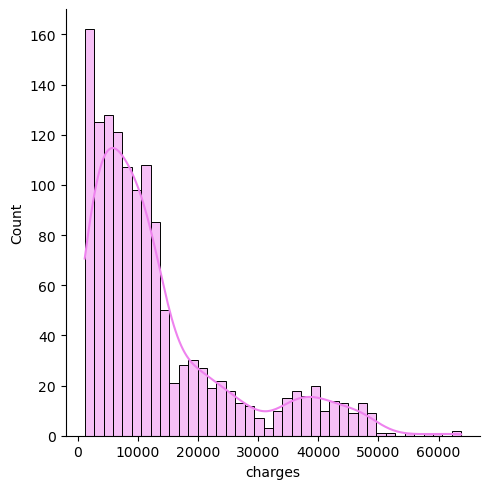

In [6]:
sns.displot(df['charges'], color="violet", bins = 40, kde = True)
plt.show()

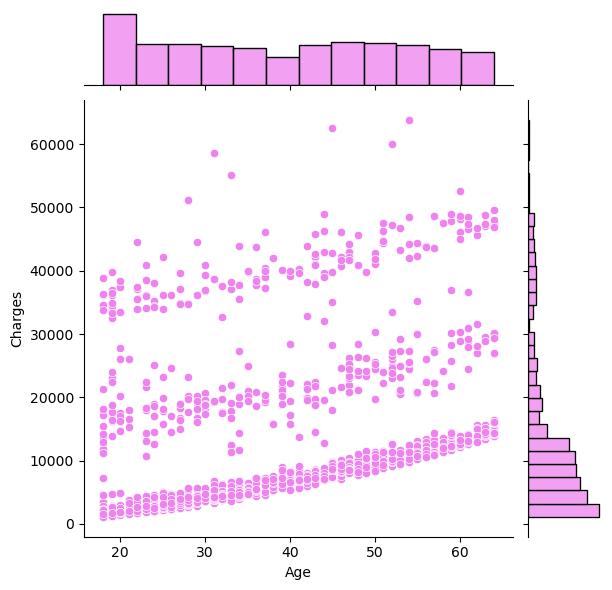

In [7]:
sns.jointplot(data = df,y = "charges", x = "age", color="violet")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

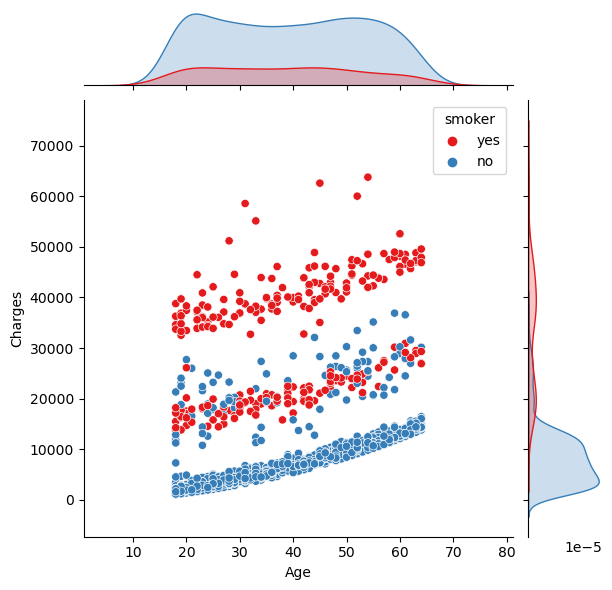

In [8]:
sns.jointplot(data = df,y = "charges", x = "age", palette="Set1", hue = 'smoker')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

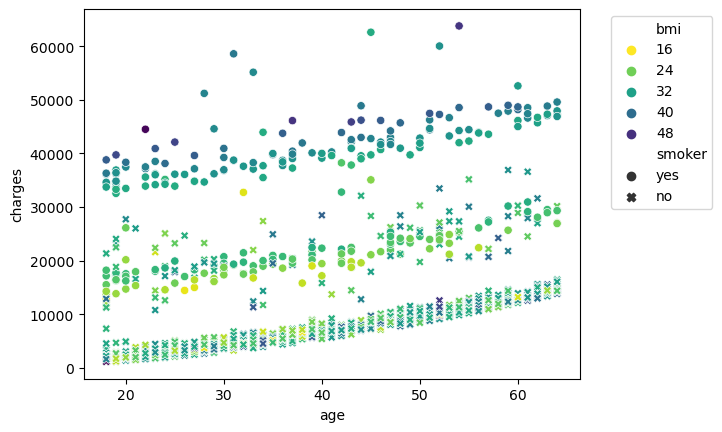

In [9]:
sns.scatterplot(data = df, x = "age", y = "charges", style = "smoker", hue = "bmi", palette = "viridis_r")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

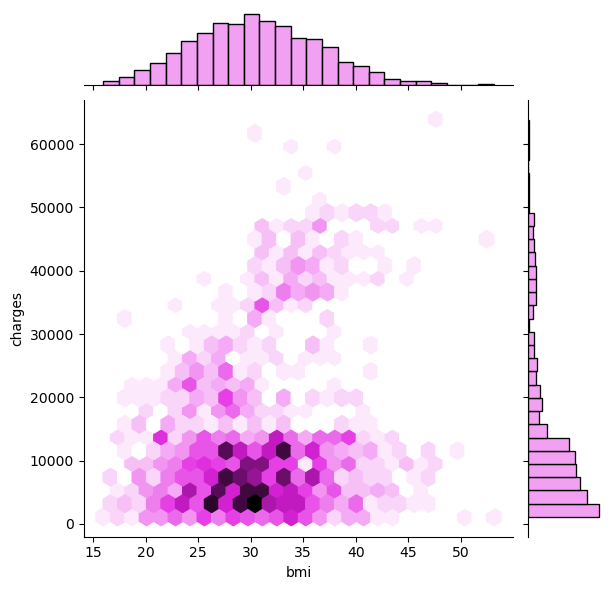

In [10]:
sns.jointplot(x = "bmi", y = "charges", data = df, kind ="hex",color="violet")

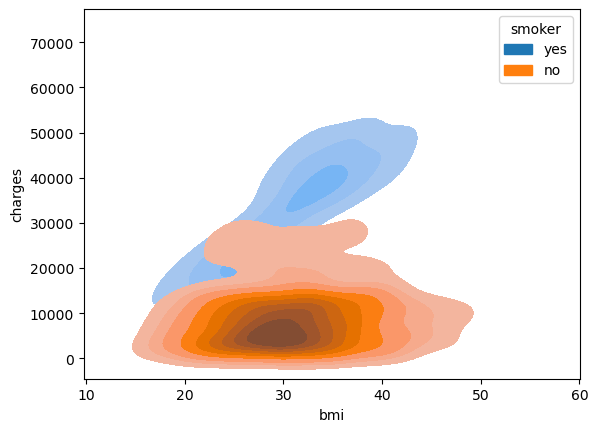

In [11]:
sns.kdeplot(data = df, x = 'bmi', y = 'charges', hue = 'smoker', fill = True)
plt.show()

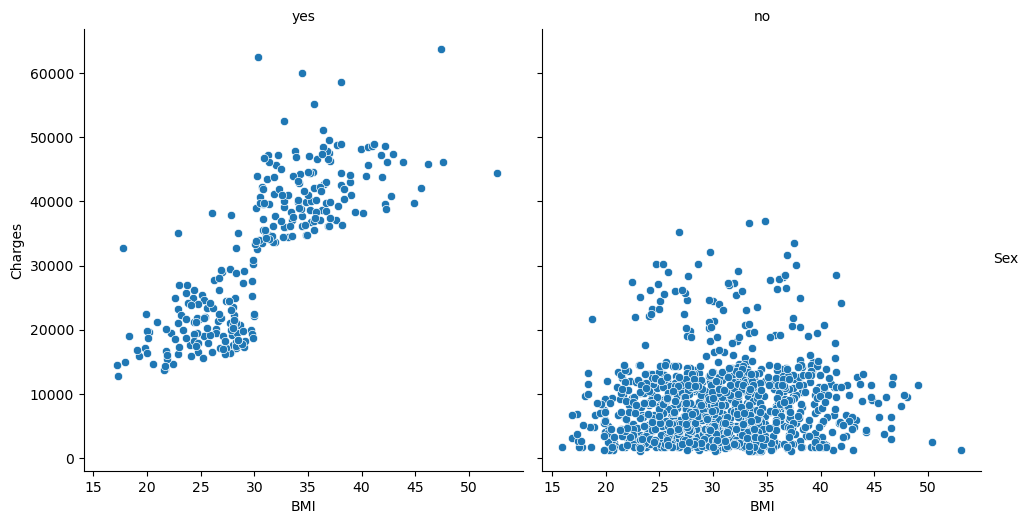

In [12]:
g = sns.FacetGrid(df, col="smoker", height=5, aspect=1)

g.map(sns.scatterplot, "bmi", "charges")

g.set_titles(col_template="{col_name}")
g.set_axis_labels("BMI", "Charges")
g.add_legend(title="Sex")

sns.despine()
plt.subplots_adjust(top=1)
plt.show()

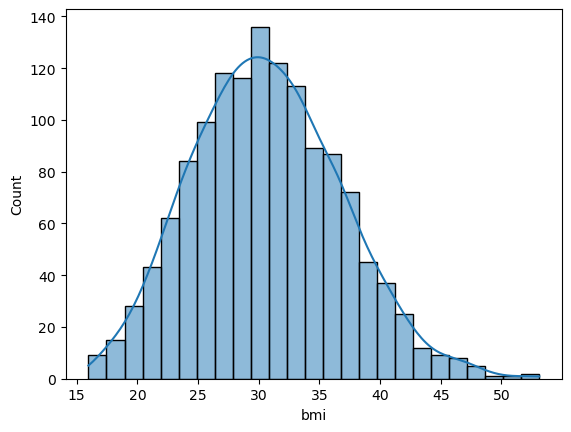

In [13]:
sns.histplot(df['bmi'], kde = True)
plt.show()

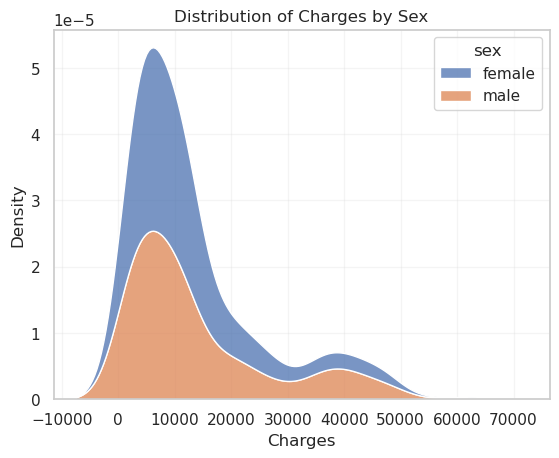

In [14]:
sns.set(style="whitegrid")

sns.kdeplot(data=df, x="charges", hue="sex", multiple="stack")

plt.title("Distribution of Charges by Sex")
plt.xlabel("Charges")
plt.ylabel("Density")

plt.grid(True, linestyle='-', alpha=0.2)


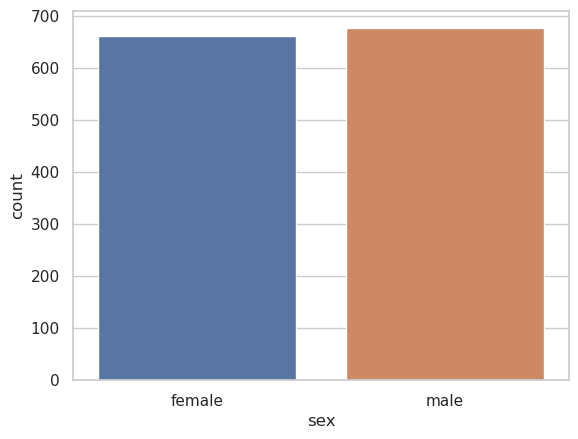

In [15]:
sns.countplot(data = df, x = 'sex')
plt.show()

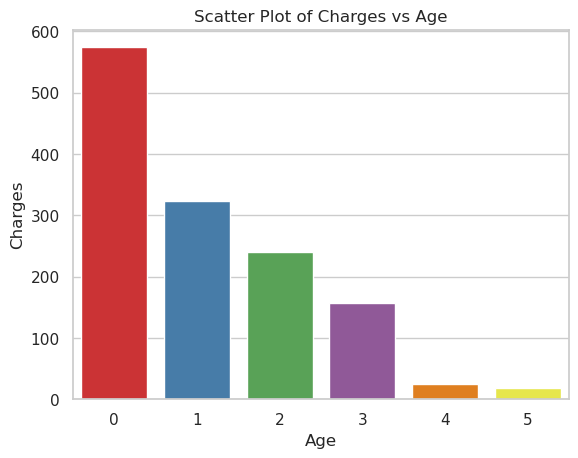

In [16]:
sns.set_style('whitegrid')

palette = 'Set1'

sns.countplot(data = df, x = 'children', palette = palette)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Charges vs Age')
plt.show()


<Axes: xlabel='charges', ylabel='Density'>

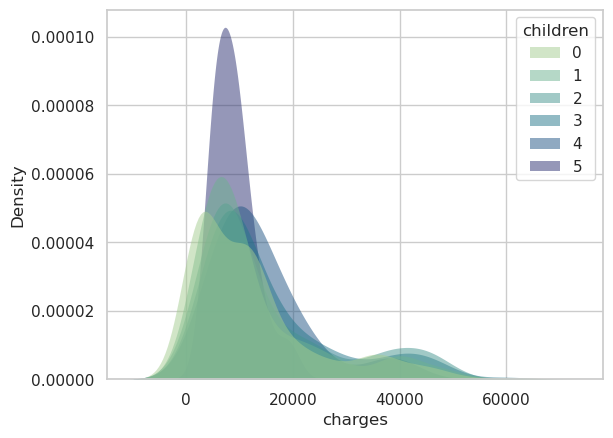

In [17]:
sns.kdeplot(
   data=df, x="charges", hue="children",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
